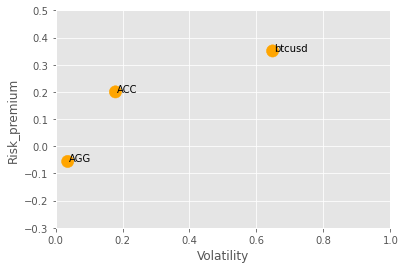

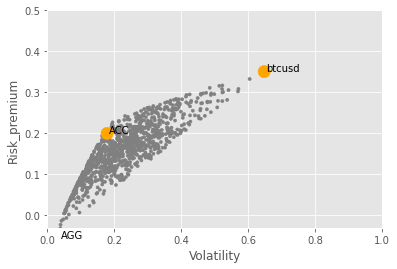

<ipython-input-2-5cb3a0d65b5c>:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  max_sharpe = random[(random['Risk_premium']>= 0)][(random['Volatility']<= 1)].sharpe.max()


In [2]:
import pandas as pd                                    # Working with tables
import numpy as np

%run teamdoge.ipynb


from tiingo import TiingoClient                       # Stock prices.
import quandl                                         # Economic data, futures prices, ...

# API keys:
tiingo = TiingoClient({'api_key':'349dd4117e5d1ed71a22f0207a8e439cf3f7b06b'})
quandl.ApiConfig.api_key = '_ci7hzC_sPkspKWz2yzt'                      # Replace the XXXX with your API key (must be inside the ' ').

import matplotlib.pyplot as plt                        # Basic plot library.
plt.style.use('ggplot')                                # Make plots look nice.
%matplotlib inline

In this notebook, we will find the efficent frontier and max sharpe ratio weights of a portfolio of ACC and AGG.

In [3]:
tickers    = ['ACC','AGG']
start_date = '3-23-2017'
end_date   = '3-23-2022'

Now let's look at the returns

In [4]:
r = returns(tickers, start_date, end_date)
r

,ACC,AGG
2017-03-23,NaN,NaN
2017-03-24,0.002294,-0.000830
2017-03-27,-0.017058,0.002399
2017-03-28,0.006349,-0.002302
2017-03-29,-0.003575,0.002215
...,...,...
2022-03-16,0.000184,0.000743
2022-03-17,0.015789,0.001672
2022-03-18,-0.001265,0.002225
2022-03-21,-0.001086,-0.009806


In [5]:
risk_premiums = rp(tickers, start_date, end_date)
risk_premiums

ACC    0.118368
AGG    0.010221
dtype: float64

In [6]:
volatility = vol(tickers, start_date, end_date)
volatility

ACC    0.334770
AGG    0.048052
dtype: float64

In [7]:
correlation = corr(tickers, start_date, end_date)
correlation

,ACC,AGG
ACC,1.000000,0.136837
AGG,0.136837,1.000000


In [8]:
covariance = cov(tickers, start_date, end_date)
covariance

,ACC,AGG
ACC,0.112071,0.002201
AGG,0.002201,0.002309


Now we can make a mean-volatility plot to see where these two stocks stand.

<AxesSubplot:xlabel='Volatility', ylabel='Risk_premium'>

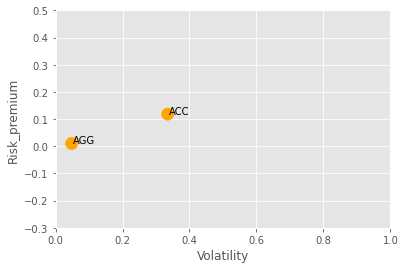

In [9]:
mean_vol_plot(risk_premiums,volatility)

We can also make an efficient frontier plot to see how different weighted combinations of these stocks would land on the mean-volatility plot.

<AxesSubplot:xlabel='Volatility', ylabel='Risk_premium'>

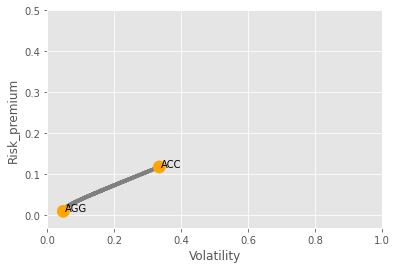

In [10]:
efficient_frontier(risk_premiums,volatility,covariance)

Time to find the weights that correspond to the maximum sharpe ratio portfolio.

In [11]:
sharpe_weights = max_sharpe_weights(risk_premiums, volatility, covariance)
sharpe_weights

,Risk_Premiums,Weights,weighted_ret
ACC,0.118368,0.22171,0.026243
AGG,0.010221,0.77829,0.007955


In [12]:
r = returns(tickers, start_date, end_date)
r

,ACC,AGG
2017-03-23,NaN,NaN
2017-03-24,0.002294,-0.000830
2017-03-27,-0.017058,0.002399
2017-03-28,0.006349,-0.002302
2017-03-29,-0.003575,0.002215
...,...,...
2022-03-16,0.000184,0.000743
2022-03-17,0.015789,0.001672
2022-03-18,-0.001265,0.002225
2022-03-21,-0.001086,-0.009806


In [13]:
rf = 0.011
r*sharpe_weights['Weights']
r['total_ret'] = r.ACC + r.AGG
r

,ACC,AGG,total_ret
2017-03-23,NaN,NaN,NaN
2017-03-24,0.002294,-0.000830,0.001464
2017-03-27,-0.017058,0.002399,-0.014659
2017-03-28,0.006349,-0.002302,0.004048
2017-03-29,-0.003575,0.002215,-0.001361
...,...,...,...
2022-03-16,0.000184,0.000743,0.000927
2022-03-17,0.015789,0.001672,0.017460
2022-03-18,-0.001265,0.002225,0.000960
2022-03-21,-0.001086,-0.009806,-0.010892


In [15]:
r

,ACC,AGG,total_ret
2017-03-23,NaN,NaN,NaN
2017-03-24,0.002294,-0.000830,0.001464
2017-03-27,-0.017058,0.002399,-0.014659
2017-03-28,0.006349,-0.002302,0.004048
2017-03-29,-0.003575,0.002215,-0.001361
...,...,...,...
2022-03-16,0.000184,0.000743,0.000927
2022-03-17,0.015789,0.001672,0.017460
2022-03-18,-0.001265,0.002225,0.000960
2022-03-21,-0.001086,-0.009806,-0.010892


In [16]:
max_rp = r.total_ret.mean()*252 - 0.011
max_rp

0.13958924059011385

In [17]:
max_vol = r.total_ret.std()*252**0.05
max_vol

0.02862503359688473

In [18]:
max_sharpe = max_rp/max_vol
max_sharpe

4.876474297144768